In [3]:
# Import all the libraries we are going to use
import seaborn as sns
import tensorflow as tf 
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
import numpy as np 
from glob import glob 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob
import os, random
import shutil
import pathlib
from keras.preprocessing import image
import keras

In [4]:
# train 
# validation 


os.chdir("/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/")
current_dir = os.path.abspath('')

size=256 
IMAGE_SIZE = [size,size]
image_height, image_width = size, size
batch_size = 32

train_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/train/'))
validation_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/validation/'))
test_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/test/'))
print(train_images_folder)

# Load the training dataset, while also resizing images for training, setting the batch size and label mode to binary as we have 2 classes 
train_ds = tf.keras.preprocessing.image_dataset_from_directory( train_images_folder,  seed=70104, image_size=(image_height, image_width), batch_size=batch_size, label_mode='binary') 

# load the validation dataset, while also resizing images for training, setting the batch size and label mode to binary as we have 2 classes 
validation_ds = tf.keras.preprocessing.image_dataset_from_directory( validation_images_folder, seed=70104, image_size=(image_height, image_width), batch_size=batch_size, label_mode='binary') 

#test_ds = tf.keras.preprocessing.image_dataset_from_directory( test_images_folder, seed=70104, image_size=(image_height, image_width)) 

# Create ResNet50 model, this is pretrained with the ImageNet images and so uses the weights obtained from this. 
"""base_model = ResNet50(input_shape=(image_height, image_width, 3), weights="imagenet", include_top=False )
print(base_model.summary())

base_model.trainable = False

# We use the base model using ImageNet training, we then Flatten the ouptut of the convolutional layers, we use ReLu for the activation layer 
model = Sequential([base_model, Flatten(), Dense(384, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
number_of_epochs = 9
# We fit the model with our training dataset
history = model.fit(train_ds, validation_data=validation_ds, epochs=number_of_epochs)
plt.figure(figsize=(8,8))
epochs_range = range(number_of_epochs)
plt.plot(epochs_range, history.history['accuracy'], label="Training - Accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation - Accuracy")
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('CNN ResNet50 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()"""

# Currently commented out not to overwrite model we saved for re-use
# Model was run many times 
# model.save("monet_vs_picasso_ResNet50.keras")


#restnet_net = ResNet50(input_shape=IMAGE_SIZE + [3],weights="imagenet", include_top=False )
#print(restnet_net.summary())
# freeze the weights
#for layer in restnet_net.layers:
 #   layer.trainable = False
#classes = glob('./data/train/*')
#print(classes)
#number_of_classes = len(classes)
#from datasets import load_dataset
#ds = load_dataset("huggan/wikiart")
#tf.keras.applications.ResNet50(
#    include_top=True,
#    weights='imagenet',
#    input_tensor=None,
#    input_shape=None,
#    pooling=None,
#    classes=1000,
#    classifier_activation='softmax'
#)



/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/train
Found 1673 files belonging to 2 classes.
Found 417 files belonging to 2 classes.


'base_model = ResNet50(input_shape=(image_height, image_width, 3), weights="imagenet", include_top=False )\nprint(base_model.summary())\n\nbase_model.trainable = False\n\n# We use the base model using ImageNet training, we then Flatten the ouptut of the convolutional layers, we use ReLu for the activation layer \nmodel = Sequential([base_model, Flatten(), Dense(384, activation=\'relu\'), Dense(2, activation=\'softmax\')])\n\nmodel.compile(optimizer=Adam(), loss=\'sparse_categorical_crossentropy\', metrics=[\'accuracy\'])\nnumber_of_epochs = 9\n# We fit the model with our training dataset\nhistory = model.fit(train_ds, validation_data=validation_ds, epochs=number_of_epochs)\nplt.figure(figsize=(8,8))\nepochs_range = range(number_of_epochs)\nplt.plot(epochs_range, history.history[\'accuracy\'], label="Training - Accuracy")\nplt.plot(epochs_range, history.history[\'val_accuracy\'], label="Validation - Accuracy")\nplt.axis(ymin=0.4, ymax=1)\nplt.grid()\nplt.title(\'CNN ResNet50 Model accur

In [5]:
model = keras.models.load_model(os.path.join(current_dir,'monet_vs_picasso_ResNet50.keras'))

In [6]:
# Redo classifications on the validation dataset so we can produce confusion matrix and to show which paintings were 
# misclassfied, here this is done for Monet's work
os.chdir(current_dir)
predictions = []
os.chdir(os.path.join(current_dir, "../presplit_data/validation/monet")) 
monet_validation_paintings_count = len(glob.glob('*'))
predictions = [0] *monet_validation_paintings_count
count = 0
for file in glob.glob('*.*'):
    destination = os.path.join(current_dir, "../presplit_data/validation/monet") 
    image = tf.keras.utils.load_img(os.path.join(destination, file), target_size=(image_height,image_width))
    input_arr = tf.keras.utils.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions[count] =np.argmax( model.predict(input_arr)[0])
    # Print out files which were misclassified
    if (predictions[count] ==1):
        print(file)
    count +=1

y_pred_res_monet =  predictions # np.argmax(predictions, axis=1)
y_labels_monet = [0] * len(y_pred_res_monet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
claude-monet_camille-monet-on-a-garden-bench.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
claude-monet_portrait-of-germaine-hoschede-with-a-doll-1877.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━

In [7]:
# Redo classifications on the validation dataset so we can produce confusion matrix and to show which paintings were 
# misclassfied, here this is done for Picasso's work
os.chdir(os.path.join(  current_dir, "../presplit_data/validation/picasso")) 
picasso_validation_paintings_count = len(glob.glob('*'))
predictions = [0] * picasso_validation_paintings_count
count = 0
for file in glob.glob('*.*'):
    destination = os.path.join(current_dir, "../presplit_data/validation/picasso") 
    image = tf.keras.utils.load_img(os.path.join(destination, file), target_size=(image_height,image_width))
    input_arr = tf.keras.utils.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions[count] = np.argmax(( model.predict(input_arr)[0]))
    # Print out files which were misclassified
    if (predictions[count] ==0):
        print(file)
    count += 1

y_pred_res_picasso = predictions 
y_labels_picasso = [1] * len(y_pred_res_picasso)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
pablo-picasso_self-portrait-1896.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Generating Confusion Matrix and Classification Report
y_preds = (y_pred_res_monet) + (y_pred_res_picasso)
y_labels = y_labels_monet + y_labels_picasso
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(y_labels, y_preds)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Monet','Picasso']
class_rep_res = classification_report(y_labels, y_preds, target_names=target_names)
print(class_rep_res)

Confusion Matrix
[[258   7]
 [  7 145]]
Classification Report
              precision    recall  f1-score   support

       Monet       0.97      0.97      0.97       265
     Picasso       0.95      0.95      0.95       152

    accuracy                           0.97       417
   macro avg       0.96      0.96      0.96       417
weighted avg       0.97      0.97      0.97       417



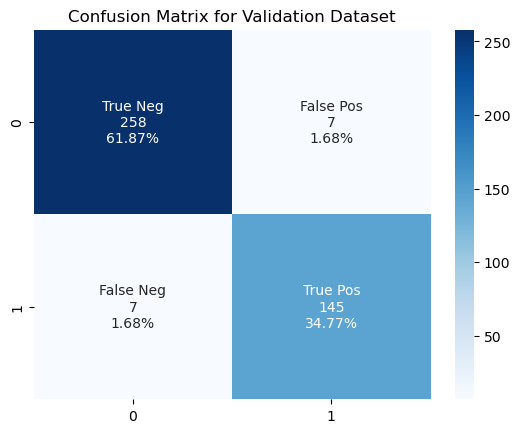

In [9]:
import seaborn as sns
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix_res.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix_res.flatten()/np.sum(conf_matrix_res)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(conf_matrix_res, annot=labels, fmt='', cmap='Blues', ax = ax)

ax.set_title('Confusion Matrix for Validation Dataset')
plt.show()

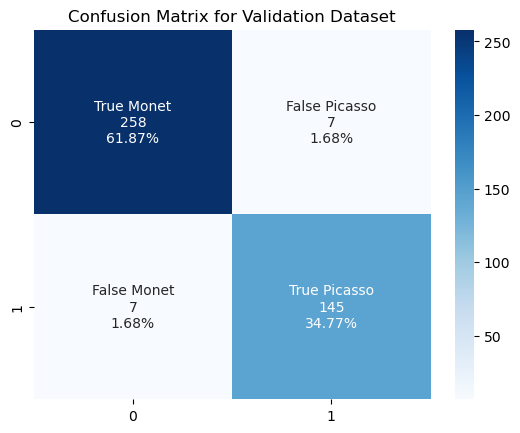

In [10]:

group_names = ['True Monet','False Picasso', 'False Monet','True Picasso']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix_res.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix_res.flatten()/np.sum(conf_matrix_res)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(conf_matrix_res, annot=labels, fmt='', cmap='Blues', ax = ax)

ax.set_title('Confusion Matrix for Validation Dataset')
plt.show()

In [25]:
import os
from PIL import Image
# Testing for black in the misclassified Monet images 
files = ["claude-monet_camille-monet-on-a-garden-bench.jpg", "claude-monet_portrait-of-germaine-hoschede-with-a-doll-1877.jpg", "claude-monet_victor-jacquemont-holding-a-parasol.jpg", "claude-monet_vase-of-tulips.jpg", "claude-monet_camille-also-known-as-the-woman-in-a-green-dress.jpg",
"claude-monet_red-mullets.jpg","claude-monet_the-red-cape-madame-monet.jpg"]

for f in files:
    file_dir = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/validation/monet'))
    filename = os.path.join(file_dir, f)
    print(filename)
 
    im = Image.open(filename)
    pixels = im.getdata()          # get the pixels as a flattened sequence
    black_thresh = (1,1,1)
    darkest_colour = (255, 255, 255)
    nblack = 0
    for pixel in pixels:
        if pixel < black_thresh:
            nblack += 1
        if pixel < darkest_colour :
            darkest_colour = pixel
    n = len(pixels)
    if(nblack > 100):
        print(f, " Contains Black")
    if (nblack / float(n)) > 0.5:
        print("mostly black")
    print(darkest_colour)


/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/validation/monet/claude-monet_camille-monet-on-a-garden-bench.jpg
claude-monet_camille-monet-on-a-garden-bench.jpg  Contains Black
(0, 0, 0)
/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/validation/monet/claude-monet_portrait-of-germaine-hoschede-with-a-doll-1877.jpg
claude-monet_portrait-of-germaine-hoschede-with-a-doll-1877.jpg  Contains Black
(0, 1, 0)
/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/validation/monet/claude-monet_victor-jacquemont-holding-a-parasol.jpg
(0, 0, 9)
/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/validation/monet/claude-monet_vase-of-tulips.jpg
claude-monet_vase-of-tulips.jpg  Contains Black
(0, 9, 16)
/Users/margaretsnape/Documents/Coursera/Imperial/Unstructured Data Analysis/UDA_HW4/presplit_data/validation

Testing with a set of 6 Handpicked images 

In [ ]:
# Testing with set of 6 Handpicked images
test_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/test/'))

#1 Claude Monet's still-life-with-pears-and-grapes-1.jpg which is similar to Pablo Picasso's Still Life (The dessert)
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet Still-life-with-pears-and-grapes-1 percentages, [Monet, Picasso] : ", prediction )

#2 Claude Monet's claude-monet_the-garden_with_picasso.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_the-garden.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet claude-monet_the-garden with Picasso signature, [Monet, Picasso] : ", prediction )

#3 Early Claude Monet claude-monet_view-at-rouelles-le-havre.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_view-at-rouelles-le-havre.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet view-at-rouelles-le-havre percentages, [Monet, Picasso] : ", prediction )

#4 A Pablo picasso painting from his impressionism style - Portrait of Minguell pablo-picasso_portrait-of-minguell.jpg 
# This is very similar to Monet's painting claude-monet_leon-peltier.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_portrait-of-minguell.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Pablo Picasso Portrait-of-minguell prediction percentages, [Monet, Picasso] : ", prediction )

#5 A Pablo Picasso painting similar to Monet's port paintings, 
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Pablo Picasso view-of-the-port-of-valencia prediction percentages, [Monet, Picasso] : ", prediction )

#6 A Pablo Picasso painting, a portrait of a woman, which we will later use in the  
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_woman-on-the-street-1901.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Pablo Picasso woman-on-the-street-1901 prediction percentages, [Monet, Picasso] : ", prediction )

#7 Adding Picasso's signature from Head of Woman, to Claude Monet's claude-monet_still-life-with-pears-and-grapes-1-with-picasso-signature.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-with-picasso-signature.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet still-life-with-pears-and-grapes-1 with Picasso signature, [Monet, Picasso] : ", prediction )

#8 Adding Picasso's signature from Head of Woman, to Claude Monet's claude-monet_the-garden_with_picasso_signature.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_the-garden_with_picasso_signature.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet the-garden with Picasso signature, [Monet, Picasso] : ", prediction )


#7 camille-pissarro_resting-in-the-woods-pontoise-1878.jpg
image = keras.utils.load_img(os.path.join(test_images_folder, 'camille-pissarro_resting-in-the-woods-pontoise-1878.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Camille Pissarro painting resting-in-the-woods-pontoise-1878.jpg percentages, [Monet, Picasso] : ", prediction )

#8 Georges Braque painting the-mantelpiece-1925
image = keras.utils.load_img(os.path.join(test_images_folder, 'georges-braque_the-mantelpiece-1925.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Georges Braque painting the-mantelpiece-1925 percentages, [Monet, Picasso] : ", prediction )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Claude Monet Still-life-with-pears-and-grapes-1 percentages, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Claude Monet claude-monet_the-garden with Picasso signature, [Monet, Picasso] :  [[1.0000000e+00 5.6707844e-10]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Claude Monet view-at-rouelles-le-havre percentages, [Monet, Picasso] :  [[1.0000000e+00 1.2289264e-33]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Pablo Picasso Portrait-of-minguell prediction percentages, [Monet, Picasso] :  [[5.8889363e-22 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Pablo Picasso view-of-the-port-of-valencia prediction percentages, [Monet, Picasso] :  [[1.000000e+00 7.104249e-23]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Pablo Picasso woman-on-the-street-1901 prediction percentages, [Monet, Picasso] :  [[9.386033e-24 1.000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Claude Monet still-life-with-pears-and-grapes-1 with Picasso signature, [Monet, 

In [13]:

#9 Adding black to Monet paintings 
from PIL import Image
import numpy as np
img = Image.open(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1.jpg'))
width = img.size[0] 
height = img.size[1] 
for i in range(0,width):# process all pixels
    for j in range(0,height):
        data = img.getpixel((i,j))
        if ( data[0] < 40 and  data[1] < 40 and data[2] < 40 ):
            img.putpixel((i,j),(0, 0, 0))

#img.save(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-with-black.jpg'))
#9  Adding black to Monet still-life-with-pears-and-grapes-1 paintings 
image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-with-black.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet still-life-with-pears-and-grapes-1 with added black percentages, [Monet, Picasso]: ", prediction )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Claude Monet still-life-with-pears-and-grapes-1 with added black percentages, [Monet, Picasso]:  [[1. 0.]]


In [14]:
# 10 Converting all to grayscale and checking if it has any affect on predictions 
import cv2
image = Image.open(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1.jpg'))
grayscale_image = image.convert("L")
grayscale_image.show()
#img.save(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-black-and-white.jpg'))

image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_still-life-with-pears-and-grapes-1-black-and-white.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet still-life-with-pears-and-grapes-1 black and white  percentages, [Monet, Picasso] : ", prediction )

image = Image.open(os.path.join(test_images_folder, 'claude-monet_view-at-rouelles-le-havre.jpg'))
grayscale_image = image.convert("L")
#img.save(os.path.join(test_images_folder, 'claude-monet_view-at-rouelles-le-havre-black-and-white.jpg'))

image = keras.utils.load_img(os.path.join(test_images_folder, 'claude-monet_view-at-rouelles-le-havre-black-and-white.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Claude Monet view-at-rouelles-le-havre.jpg black and white  percentages, [Monet, Picasso] : ", prediction )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Claude Monet still-life-with-pears-and-grapes-1 black and white  percentages, [Monet, Picasso] :  [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Claude Monet view-at-rouelles-le-havre.jpg black and white  percentages, [Monet, Picasso] :  [[1. 0.]]


In [ ]:
#11 Add Gaussian noise to Picasso paintings and check if prediction will change
"""image = cv2.imread(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia.jpg'))
blurred_img = cv2.GaussianBlur(image, (21, 21), 0)
mask = np.zeros(image.shape, np.uint8)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = Image.open(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia.jpg'))
#gray = image.convert("L")
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[2]
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mask, contours, -1, (255,255,255),5)
output = np.where(mask==np.array([255, 255, 255]), blurred_img, image)
output.show()"""

test_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/test/'))

image = cv2.imread(os.path.join(test_images_folder, 'pablo-picasso_woman-on-the-street-1901.jpg')) 
  
#cv2.imshow('Original Image', image) 
#cv2.waitKey(0) 
# Gaussian Blur 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 
#cv2.imshow('Gaussian Blurring', Gaussian) 
cv2.imwrite(os.path.join(test_images_folder, 'pablo-picasso_woman-on-the-street-1901-gaussian.jpg'), Gaussian)

# A Pablo Picasso painting with Gaussian blur similar to Monet's portrait paintings, 
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_woman-on-the-street-1901-gaussian.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Pablo Picasso pablo-picasso_woman-on-the-street-1901 with Gaussian blur prediction percentages, [Monet, Picasso] : ", prediction )

image = cv2.imread(os.path.join(test_images_folder, 'pablo-picasso_portrait-of-minguell.jpg')) 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 
#cv2.imshow('Gaussian Blurring', Gaussian) 
cv2.imwrite(os.path.join(test_images_folder, 'pablo-picasso_portrait-of-minguell-gaussian.jpg'), Gaussian)
# A Pablo Picasso painting with Gaussian blur similar to Monet's port paintings, 
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_portrait-of-minguell-gaussian.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("Pablo Picasso pablo-picasso_portrait-of-minguell with Gaussian blur prediction percentages, [Monet, Picasso] : ", prediction )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Pablo Picasso view-of-the-port-of-valencia with Gaussian blur prediction percentages, [Monet, Picasso] :  [[1.0000000e+00 1.6375662e-20]]


In [36]:
test_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/test/'))
  
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_portrait-of-minguell.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("pablo-picasso_portrait-of-minguell_final.png, [Monet, Picasso] : ", prediction )

image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_woman-on-the-street-1901.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("pablo-picasso_woman-on-the-street-1901_final, [Monet, Picasso] : ", prediction )

image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_view-of-the-port-of-valencia.jpg'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("pablo-picasso_view-of-the-port-of-valencia.jpg, [Monet, Picasso] : ", prediction )



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
pablo-picasso_portrait-of-minguell_final.png, [Monet, Picasso] :  [[5.8889363e-22 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
pablo-picasso_woman-on-the-street-1901_final, [Monet, Picasso] :  [[9.386033e-24 1.000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
pablo-picasso_view-of-the-port-of-valencia.jpg, [Monet, Picasso] :  [[1.000000e+00 7.104249e-23]]


In [ ]:
# Testing the 3 images created using the code from 'Stylized Nueral Painting' code
# the images were created using the following command :
# stylized-neural-painting % python demo_prog.py --img_path ./test_images/pablo-picasso_woman-on-the-street-1901.jpg --canvas_color 'white' --max_m_strokes 4000 --max_divide 5 --renderer oilpaintbrush --renderer_checkpoint_dir checkpoints_G_oilpaintbrush --net_G zou-fusion-net
# These are 3 Picasso paintings which were classified correctly in their original form 
# We now test if when modified these are classified differently
test_images_folder = os.path.abspath(os.path.join(current_dir, '..', 'presplit_data/test/'))
  
image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_portrait-of-minguell_final.png'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("pablo-picasso_portrait-of-minguell_final.png, [Monet, Picasso] : ", prediction )

image = keras.utils.load_img(os.path.join(test_images_folder, 'pablo-picasso_woman-on-the-street-1901_final.png'), target_size =(image_height, image_width))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
print("pablo-picasso_woman-on-the-street-1901_final, [Monet, Picasso] : ", prediction )



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
pablo-picasso_portrait-of-minguell_final.png, [Monet, Picasso] :  [[0.9976568  0.00234319]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
pablo-picasso_woman-on-the-street-1901_final, [Monet, Picasso] :  [[1.0000000e+00 6.3542026e-13]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
pablo-picasso_view-of-the-port-of-valencia.jpg, [Monet, Picasso] :  [[1.000000e+00 1.153308e-17]]


We see each painting is now classified as Monet paintings , i.e. we have changed the classification from Picasso to Monet by using the 'Stylized Nueral Painting' code